# Linear regression Oregon Housing Example

In this example we will train a linear regression model to predict house prices. We will use the Housing dataset of the US state of Oregon. 

The data is stored in a comma separated text file (CSV). Which can be opened in notepad or Microsoft Excel. This is a simple text file where each line of text contains one row of data and values are separated by a comma (,). The file contains 3 columns. The first two columns are the two features ( area of house in square feet, and number of rooms) and the third column contains the price which is our dependent or target variable (y). 

In [1]:
import numpy as np
# reading a csv file and store as numpy array using
# numpy genfromtxt function

# make sure that the oragonhousing.csv and housing.py files are
# are in the same directory otherwise provide complete path
# to csv file
csv = np.genfromtxt('./oregonhousing.csv', delimiter=",")

# extract first two columns as features
X = csv[:,0:2] # note the usage of array slicing 

# the third column contains house prices which we store in y
Y = csv[:,2]  

## Plots

Lets plot the features vs price to a better understanding of the data.

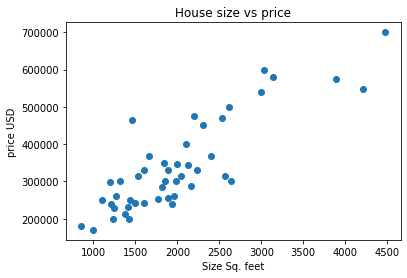

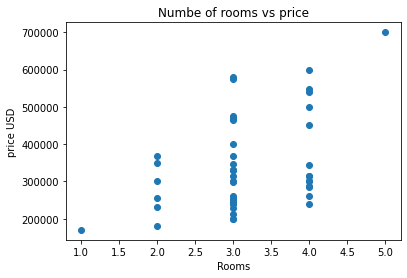

In [2]:

import matplotlib.pyplot as plt

plt.scatter(X[:,0],Y)
plt.title('House size vs price')
plt.xlabel('Size Sq. feet')
plt.ylabel('price USD')
plt.show()
#%% 
plt.scatter(X[:,1],Y)
plt.title('Numbe of rooms vs price')
plt.xlabel('Rooms')
plt.ylabel('price USD')
plt.show()

## Scaling the features

Scaling the features is necessary to as area feature (x_1) is in thousands while the number of rooms (x_2) varies between 1 and 5. The gradient descent will not converge if data is not scaled. You should experiment with executing the same code without-scaling and with-scaling to see the difference (in this case you will encounter an overflow!). 

In [3]:

# run the gradient descent code with and without scaling 
# and compare the results

sigma = np.std(X , axis=0) # calculate standared deviation of X_1 and X_2
mu = np.mean(X, axis=0) # calculate the mean of X_1 and X_2

print(sigma)
print(mu)
X[:,0] = (X[:,0] - mu[0])/ sigma[0]
X[:,1] = (X[:,1] - mu[1])/ sigma[1]

print(X)

[7.86202619e+02 7.52842809e-01]
[2000.68085106    3.17021277]
[[ 1.31415422e-01 -2.26093368e-01]
 [-5.09640698e-01 -2.26093368e-01]
 [ 5.07908699e-01 -2.26093368e-01]
 [-7.43677059e-01 -1.55439190e+00]
 [ 1.27107075e+00  1.10220517e+00]
 [-1.99450507e-02  1.10220517e+00]
 [-5.93588523e-01 -2.26093368e-01]
 [-7.29685755e-01 -2.26093368e-01]
 [-7.89466782e-01 -2.26093368e-01]
 [-6.44465993e-01 -2.26093368e-01]
 [-7.71822042e-02  1.10220517e+00]
 [-8.65999486e-04 -2.26093368e-01]
 [-1.40779041e-01 -2.26093368e-01]
 [ 3.15099326e+00  2.43050370e+00]
 [-9.31923697e-01 -2.26093368e-01]
 [ 3.80715024e-01  1.10220517e+00]
 [-8.65782986e-01 -1.55439190e+00]
 [-9.72625673e-01 -2.26093368e-01]
 [ 7.73743478e-01  1.10220517e+00]
 [ 1.31050078e+00  1.10220517e+00]
 [-2.97227261e-01 -2.26093368e-01]
 [-1.43322915e-01 -1.55439190e+00]
 [-5.04552951e-01 -2.26093368e-01]
 [-4.91995958e-02  1.10220517e+00]
 [ 2.40309445e+00 -2.26093368e-01]
 [-1.14560907e+00 -2.26093368e-01]
 [-6.90255715e-01 -2.2609336

We will use vectorized form of the gradient descent algorithm in this example. Linear algebra operations require matrices or columns vectors i.e. (m X 1 matrices) but our Y is a 1-d arrays. Therefore we will have to convert this by adding an additional dimension. Lets print the dimension before conversion.

In [4]:
print('X:', X.shape) # prints the dimenison of X
print('Y', Y.shape) # prints the dimenison of Y

X: (47, 2)
Y (47,)


We Convert Y from a 1-d array to a m X 1 column vector by adding another dimension by using np.newaxis 

Note: you can also use None instead of np.newaxis

In [5]:
y = Y[:, np.newaxis] 
print('y:',y.shape) # print new output vector 

y: (47, 1)


Lets store the number of samples (training data size) in a variable (m).

In [6]:
m = X.shape[0] # number of samples

In [18]:
print(m)

47


We create a new m X 1 column vector of 1s by using np.ones((m,1)) and combine it and X horizontally.
The resultant matrix is stored in Xmat. 

Note : np.ones() needs a tuple as input

In [19]:
Xmat = np.hstack((np.ones((m,1)),X))
print('Xmat:',Xmat.shape)

Xmat: (47, 3)


Lets store the number of features in a variable (n)

In [20]:
n = Xmat.shape[1] # number of features 

We initialize the parameters $w_i$ by zero. This is just for demonstration, in practical situations initialization by small random numbers is better. 

In [21]:
W = np.zeros(n) # theta as an array of n elements 
W = W[:,np.newaxis] # add an axis to make it a n x 1 vector
print('W',W.shape)

W (3, 1)


## Vectorized gradient descent

Lets set the learning rate ($\alpha$) and the number of iterations (epochs) for the training loop before starting the training.

In [22]:
np.set_printoptions(precision=3,suppress =True) # printing settings

# alpha is the learning rate
alpha =  0.05 # experiment with differnt learning rates

numiter = 250 # numbe of iterations 

for i in range (1,numiter+1):
    
    # print = sign fifty times. * is string repetition operator
    # to create a separator line between iterations
    print('='*50) 
    
    print('Iteration: {:5d} W:{}'.format(i,W.T[0]))

    # find predicted y by using the vectorized version of the hypothesis
    # Note: @ is the matrix multiplicaiton operator in python 3.5 and above 
    # For Older python versions use ypred = np.dot(Xmat, W)
    ypred = Xmat @ W # note Xmat, ypred and W are metrices or vectors.
    
    # calcualte error
    # delta is also a vector
    delta = ypred-y  
    
    # multipy alpha/m to each element of vector delta
    # * is the element wise multiplication operator
    # in numpy
    adj = alpha/m * delta 
    
    # multipy adj to corresponding feature and sum
    # note: this is a vectorized from without using 
    # any for loops. 
    W = W - (adj.T @ Xmat).T
    
print('='*50)


# print the final values of W
print('W (gradient descent):', W.T[0])

Iteration:     1 W:[0. 0. 0.]
Iteration:     2 W:[17020.633  5288.207  2735.441]
Iteration:     3 W:[33190.234 10235.415  5186.049]
Iteration:     4 W:[48551.356 14866.65   7375.613]
Iteration:     5 W:[63144.421 19205.019  9326.031]
Iteration:     6 W:[77007.833 23271.861 11057.462]
Iteration:     7 W:[90178.074 27086.884 12588.456]
Iteration:     8 W:[102689.803  30668.291  13936.086]
Iteration:     9 W:[114575.946  34032.895  15116.061]
Iteration:    10 W:[125867.782  37196.232  16142.834]
Iteration:    11 W:[136595.026  40172.654  17029.7  ]
Iteration:    12 W:[146785.907  42975.425  17788.887]
Iteration:    13 W:[156467.245  45616.8    18431.642]
Iteration:    14 W:[165664.516  48108.111  18968.306]
Iteration:    15 W:[174401.923  50459.831  19408.383]
Iteration:    16 W:[182702.46   52681.643  19760.613]
Iteration:    17 W:[190587.97   54782.503  20033.024]
Iteration:    18 W:[198079.204  56770.693  20232.993]
Iteration:    19 W:[205195.877  58653.874  20367.298]
Iteration:    20

# Normal Equations Method

Lets use the normal equations method to find the parameters. 

In [23]:
#compare the results with gradient descent 
Wn = (np.linalg.pinv(Xmat.T @ Xmat)) @ Xmat.T @ y
print('W (Normal Equations Method):\n', Wn)

W (Normal Equations Method):
 [[340412.66 ]
 [109447.796]
 [ -6578.355]]
